CPU times: user 1min 10s, sys: 712 ms, total: 1min 11s
Wall time: 1min 10s


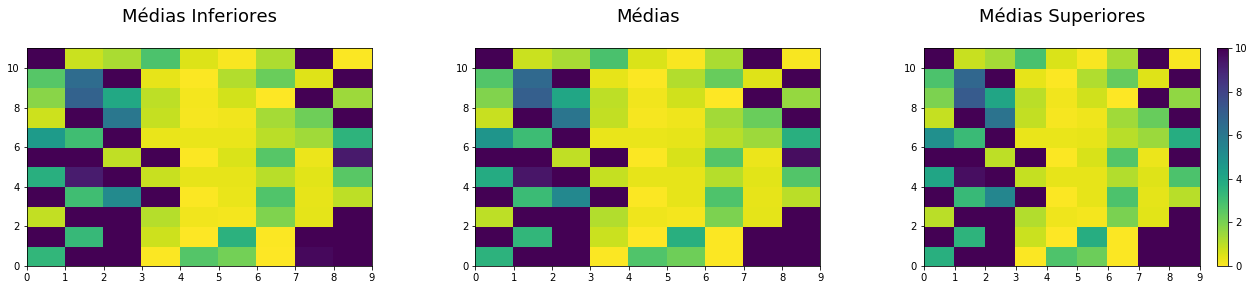

In [1]:
%%time
def listaProximaJogada(posicaoAtual, colunaMAX):
    if posicaoAtual == 0:
        return [0, 1]
    elif posicaoAtual == colunaMAX:
        return [colunaMAX - 1, colunaMAX]
    elif 0 < posicaoAtual < colunaMAX:
        return [posicaoAtual - 1, posicaoAtual, posicaoAtual + 1]
    else:
        return [-1]

from itertools import permutations, product

def produtoFiltrado():
    D = [1, 2, 3, 4, 5, 6]
    produto = list(product(D, D, D))
    produto_filtrado = []
    while (produto):
        produto_filtrado.append(produto[0])
        permutacoes = list(permutations([produto[0][0], produto[0][1], produto[0][2]]))
        for p in permutacoes:
            if p in produto:
                produto.remove(p)
    return produto_filtrado

configuracoes_dados = produtoFiltrado()

def resultadosExpressoes(configuracoes_dados):
    resultados = []
    # Laço que percorre cada terna obtida no experimento aleatório:
    for p in configuracoes_dados:
        if p[0] == p[1] and p[1] == p[2]:  # Se a = b = c, na terna (a,b,c), 
            # então adicionamos as expressões abaixo à lista "resultados":
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
        elif p[0] == p[1]:  # Se a = b, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[2] - p[0] - p[1])  # c - a - b
        elif p[1] == p[2]:  # Se b = c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] + p[2])  # b - a + c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
        elif p[0] == p[2]:  # Se a = c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
        else:  # Se a != b e b != c e a != c, adicionamos:
            resultados.append(p[0] + p[1] + p[2])  # a + b + c
            resultados.append(p[0] + p[1] - p[2])  # a + b - c
            resultados.append(p[0] - p[1] + p[2])  # a - b + c
            resultados.append(p[0] - p[1] - p[2])  # a - b - c
            resultados.append(p[1] - p[0] + p[2])  # b - a + c
            resultados.append(p[1] - p[0] - p[2])  # b - a - c
            resultados.append(p[2] - p[0] - p[1])  # c - a - b
    return resultados

resultados_expressoes = resultadosExpressoes(configuracoes_dados)
resultados_expressoes.sort()

def cardinalidade(evento, resultados_expressoes):
    cardinalidade = 0
    for r in resultados_expressoes:
        if r == evento:
            cardinalidade += 1
    return cardinalidade

def probabilidade(evento, resultados_expressoes):
    return cardinalidade(evento, resultados_expressoes) / len(resultados_expressoes)

def tabProba(resultados_expressoes):
    tab = [[7, 5, 6, 9, 4,  2, 8, 1, 3],[2, 8, 1, 8, 10, 7, 9, 4, 5],
           [7, 3, 2, 1, 5,  4, 5, 7, 3],[5, 8, 7, 2, 8,  7, 6, 9, 8],
           [7, 3, 2, 1, 5,  4, 5, 7, 3],[2, 4, 8, 5, 9,  7, 6, 8, 5],
           [8, 7, 3, 6, 4,  1, 2, 5, 1],[6, 2, 5, 7, 8,  7, 6, 4, 3],
           [8, 7, 6, 3, 5,  4, 9, 2, 7],[5, 4, 3, 8, 9,  1, 2, 5, 4],
           [2, 9, 7, 4, 6,  8, 7, 5, 9]]
    tab_proba = [[] for _ in range(9) for _ in range(11)]
    for lin in range(len(tab)):
        for col in range(len(tab[0])):
            tab_proba[lin].append([lin, col, tab[lin][col], 
                                   probabilidade(tab[lin][col], 
                                                 resultados_expressoes)])
    return tab_proba

tab_proba = tabProba(resultados_expressoes)

def probaCaminho(caminho):
    produto = 1
    for item in caminho:
        produto *= item[3]
    return produto

def mapaTabuleiro(tab_proba):
    colunaMAX = 8
    mapa = []
    for p1 in [0, 1, 2, 3, 4, 5, 6, 7, 8]:
        for p2 in listaProximaJogada(p1, colunaMAX):
            for p3 in listaProximaJogada(p2, colunaMAX):
                for p4 in listaProximaJogada(p3, colunaMAX):
                    for p5 in listaProximaJogada(p4, colunaMAX):
                        for p6 in listaProximaJogada(p5, colunaMAX):
                            for p7 in listaProximaJogada(p6, colunaMAX):
                                for p8 in listaProximaJogada(p7, colunaMAX):
                                    for p9 in listaProximaJogada(p8, colunaMAX):
                                        for p10 in listaProximaJogada(p9, colunaMAX):
                                            for p11 in listaProximaJogada(p10, colunaMAX):
                                                caminho = [
                                                    tab_proba[0][p1], tab_proba[1][p2],
                                                    tab_proba[2][p3], tab_proba[3][p4],
                                                    tab_proba[4][p5], tab_proba[5][p6],
                                                    tab_proba[6][p7], tab_proba[7][p8],
                                                    tab_proba[8][p9], tab_proba[9][p10],
                                                    tab_proba[10][p11]
                                                ]
                                                proba = probaCaminho(caminho)
                                                mapa.append((caminho, proba))
    return mapa

mapa_tabuleiro = mapaTabuleiro(tab_proba)

def distintasProbas(mapa_tabuleiro):
    distintas_probas = []
    for caminho in mapa_tabuleiro:
        if caminho[1] not in distintas_probas:
            distintas_probas.append(caminho[1])
    return distintas_probas

distintas_probas = distintasProbas(mapa_tabuleiro)

def mapaFaixaProbas(mapa_tabuleiro, distintas_probas, indice_min_proba, indice_max_proba):
    distintas_probas.sort()
    inf = distintas_probas[indice_min_proba]
    sup = distintas_probas[indice_max_proba]
    caminhos = []
    for item in mapa_tabuleiro:
        if inf <= item[1] <= sup:
            caminhos.append(item)
    return caminhos

submapa_inferior = mapaFaixaProbas(mapa_tabuleiro, distintas_probas, 0, 2000)
submapa_superior = mapaFaixaProbas(mapa_tabuleiro, distintas_probas, 21076, 23076)

import random as rd

def subMapaAleatorio(submapa, quantidade):
    lista = []
    if len(submapa) >= quantidade:
        for caminho in rd.sample(submapa, quantidade):
            lista.append(caminho)
    return lista

def total(submapa_inferior, submapa_superior):
    linf = len(submapa_inferior)
    lsup = len(submapa_superior)
    if linf < lsup:
        return linf
    return lsup

def mapaRazoes(submapa_inferior, submapa_superior):
    tab_razoes = [[[1,1] for _ in range(9)] for _ in range(11)]
    razoes = [[1 for _ in range(9)] for _ in range(11)]
    
    for caminho_prob in submapa_inferior:
        caminho = caminho_prob[0]
        for casa in caminho:
            lin = casa[0]
            col = casa[1]
            tab_razoes[lin][col][1] += 1
    for caminho_prob in submapa_superior:
        caminho = caminho_prob[0]
        for casa in caminho:
            lin = casa[0]
            col = casa[1]
            tab_razoes[lin][col][0] += 1
    for l in range(11):
        for c in range(9):
            razoes[l][c] = tab_razoes[l][c][0] / tab_razoes[l][c][1]
    return razoes

def mediasRazoes(lista_mapas_razoes):
    tam = len(lista_mapas_razoes)
    medias = [[0 for _ in range(9)] for _ in range(11)]
    for mapa_razoes in lista_mapas_razoes:
        for i in range(11):
            for j in range(9):
                medias[i][j] += mapa_razoes[i][j]
    for i in range(11):
        for j in range(9):
            medias[i][j] = medias[i][j] / tam
    return medias

def desviosRazoes(lista_mapas_razoes, medias):
    tam = len(lista_mapas_razoes)
    desvios = [[0 for _ in range(9)] for _ in range(11)]
    for mapa_razoes in lista_mapas_razoes:
        for i in range(11):
            for j in range(9):
                desvios[i][j] += abs(mapa_razoes[i][j] - medias[i][j])
    for i in range(11):
        for j in range(9):
            desvios[i][j] = desvios[i][j] / tam
    return desvios

def mediasComDesvio(medias, desvios, sup):
    medias_desvio = [[0 for _ in range(9)] for _ in range(11)]
    if sup:
        for i in range(11):
            for j in range(9):
                medias_desvio[i][j] = medias[i][j] + desvios[i][j]
    else:
        for i in range(11):
            for j in range(9):
                medias_desvio[i][j] = medias[i][j] - desvios[i][j]
    return medias_desvio

TOTAL = total(submapa_inferior, submapa_superior)

lista_mapas_razoes = []
for _ in range(2000):
    submapa_aleatorio_superior = subMapaAleatorio(submapa_superior, TOTAL)
    submapa_aleatorio_inferior = subMapaAleatorio(submapa_inferior, TOTAL)
    razoes = mapaRazoes(submapa_aleatorio_inferior, submapa_aleatorio_superior)
    lista_mapas_razoes.append(razoes)
    
medias = mediasRazoes(lista_mapas_razoes)
desvios = desviosRazoes(lista_mapas_razoes, medias)
medias_inf = mediasComDesvio(medias, desvios, False)
medias_sup = mediasComDesvio(medias, desvios, True)

from matplotlib import pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

VMAX = 10

im = ax1.pcolor(medias_inf, cmap="viridis_r", vmin=0, vmax=VMAX)
ax1.set_title('Médias Inferiores\n', fontsize=18)

ax2.pcolor(medias, cmap="viridis_r", vmin=0, vmax=VMAX)
ax2.set_title('Médias\n', fontsize=18)

ax3.pcolor(medias_sup, cmap="viridis_r", vmin=0, vmax=VMAX)
ax3.set_title('Médias Superiores\n', fontsize=18)

plt.colorbar(im)

plt.subplots_adjust(right=3, wspace=0.3)

In [ ]:
%%timeit
plt.show()

In [2]:
%%time
def jogar(tabuleiro, configuracoes_dados, imprimir=False):
    passou = 0
    coluna = rd.randint(0,2)
    pos_inicial = (0, coluna)

    i = 0

    while i < len(tabuleiro) - 1:    
        jogada = rd.sample(configuracoes_dados, 1)
        expressoes = resultadosExpressoes(jogada)
        proxima_jogada = listaProximaJogada(pos_inicial[1], 2)
        possibilidades = []
        for posicao in proxima_jogada:
            for expressao in expressoes:
                if expressao == tabuleiro[i + 1][posicao]:
                    possibilidades.append(expressao)
        if imprimir:
            print(f'Posição inicial: {pos_inicial}')
            print(f'Jogada: {jogada}')
            print(f'Expressões: {expressoes}')
            print(f'Lista da próxima jogada: {proxima_jogada}')
            print(f'Próxima linha: {tabuleiro[i + 1]}')
        if possibilidades:
            escolha = rd.choice(possibilidades)
            coluna = tabuleiro[i + 1].index(escolha)
            i += 1
        else:
            passou += 1
            
        if imprimir:
            print(f'Possibilidades: {possibilidades}')
            print(f'Jogadas sem avançar: {passou}\n')
        pos_inicial = (i, coluna)
    return passou

tab_esquerda = [[7,5,6],[2, 8,1],[7,3,2],[5,8,7],[7,3,2],[2,4,8],[8,7,3],[6,2,5],[8,7,6],
                [5,4,3],[2,9,7]]
tab_centro   = [[9,4,2],[8,10,7],[1,5,4],[2,8,7],[1,5,4],[5,9,7],[6,4,1],[7,8,7],[3,5,4],
                [8,9,1],[4,6,8]]
tab_direita  = [[8,1,3],[9, 4,5],[5,7,3],[6,9,8],[5,7,3],[6,8,5],[2,5,1],[6,4,3],[9,2,7],
                [2,5,4],[7,5,9]]

def simulacao(numero_testes):
    esquerda = []
    centro = []
    direita = []
    for _ in range(numero_testes):
        esquerda.append(jogar(tab_esquerda, configuracoes_dados))
        centro.append(jogar(tab_centro, configuracoes_dados))
        direita.append(jogar(tab_direita, configuracoes_dados))
    esquerda = sum(esquerda) / numero_testes
    centro = sum(centro) / numero_testes
    direita = sum(direita) / numero_testes
    return (esquerda, centro, direita)

import numpy as np
import pandas as pd
from multiprocessing import Pool

pool = Pool(8)

valores = [2*10**6 for _ in range(8)]

CPU times: user 369 ms, sys: 116 ms, total: 485 ms
Wall time: 889 ms


In [3]:
%%time
dados = pool.map(simulacao, valores)

CPU times: user 42 ms, sys: 416 µs, total: 42.4 ms
Wall time: 25min 51s


In [8]:
%%time
dados = np.array(dados)

df = pd.DataFrame(dados, 
                  index=['2 milhoes', '4 milhoes', '6 milhoes', '8 milhoes', 
                         '10 milhoes', '12 milhoes', '14 milhoes', '16 milhoes'], 
                  columns=['Esquerda', 'Centro', 'Direita'])

df

CPU times: user 5.29 ms, sys: 16 µs, total: 5.3 ms
Wall time: 3.61 ms


,Esquerda,Centro,Direita
2 milhoes,9.030510,11.195564,9.674335
4 milhoes,9.031308,11.193683,9.675510
6 milhoes,9.037249,11.192913,9.670267
8 milhoes,9.028303,11.193465,9.677098
10 milhoes,9.033309,11.190586,9.671939
12 milhoes,9.028954,11.192751,9.677425
14 milhoes,9.024362,11.185674,9.674352
16 milhoes,9.030079,11.189664,9.671943


In [9]:
%%timeit
df.mean()

213 µs ± 7.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%time
df['% Centro'] = 100 * (df['Centro'] - df['Esquerda']) / df['Esquerda']
df['% Direita'] = 100 * (df['Direita'] - df['Esquerda']) / df['Esquerda']

percentual = df.drop(['Esquerda', 'Centro', 'Direita'], axis=1)

percentual

CPU times: user 5.1 ms, sys: 4.04 ms, total: 9.14 ms
Wall time: 7.53 ms


,% Centro,% Direita
2 milhoes,23.974888,7.129448
4 milhoes,23.943099,7.132981
6 milhoes,23.853093,7.004543
8 milhoes,23.981945,7.186240
10 milhoes,23.881360,7.069724
12 milhoes,23.965092,7.182128
14 milhoes,23.949754,7.202620
16 milhoes,23.915459,7.108066


In [16]:
%%time
percentual.mean()

CPU times: user 3.53 ms, sys: 0 ns, total: 3.53 ms
Wall time: 3.07 ms


% Centro     23.933086
% Direita     7.126969
dtype: float64